In [2]:
from nnfs.datasets import spiral_data
import numpy as np

## Dense Layer

In [23]:
# Dense Layer
class DenseLayer:
    
    # Layer initialization
    def __init__(self, n_input :int, n_neurons :int):
        # Initialization weights and bias
        self.output = None
        self.weights : np.array = 0.01*np.random.rand(n_input, n_neurons)
        self.biases : np.array = np.zeros((1, n_neurons))
        
    # Forward 
    def forward(self, inputs):
        
        # Calculate output values from inputs, weights and bias
        self.output = np.dot(inputs, self.weights) + self.biases
    
    #Backward
    def backward(self, d_values):
        #Gradients on parameters
        self.d_weights = np.dot(self.inputs.T, d_values)
        self.d_biases = np.sum(d_values, axis=0, keepdims=True)
        
        # Gradient on values 
        self.d_inputs = np.dot(d_values, self.weights.T)
    
# Relu Activation
class ActivationRelU:
    

    def __init__(self):
        self.output = None
    #Forward pass
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
    #Backward
    def backward(self, d_values):
        self.d_inputs = d_values.copy()
        
        self.d_inputs[self.inputs <=0] = 0
#Softmax activation 
class ActivationSoftmax:
    
    def __init__(self):
        self.output = None
    
    # Forward pass
    def forward(self, inputs):
        
        #Get un_normalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        #Normalize them for each sample
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities
    

In [24]:
# Create dataset 
X, y = spiral_data(samples=100, classes=3) 
# Create Dense layer with 2 input features and 3 output values 
dense1 = DenseLayer(2, 3) 
# Create ReLU activation (to be used with Dense layer): 
activation1 = ActivationRelU()
# Create second Dense layer with 3 input features (as we take output # of previous layer here) and 3 output values (output values) 
dense2 = DenseLayer(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = ActivationSoftmax() 
# Make a forward pass of our training data through this layer 
dense1.forward(X) 
# Make a forward pass through activation function 
# it takes the output of first dense layer here 
activation1.forward(dense1.output) 
# Make a forward pass through second Dense layer 
# it takes output of activation function of first layer as inputs
dense2.forward(activation1.output) 
# Make a forward pass through activation function # it takes the output of second dense layer here 
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333335  0.33333316 0.33333334]
 [0.3333335  0.33333316 0.33333334]
 [0.3333336  0.33333302 0.3333333 ]
 [0.33333388 0.33333275 0.3333333 ]]


## Loss Function

In [25]:
#Common loss class
class Loss:
    
    
    def forward(self, output, y):
        pass
    
    def calculate(self, output, y):
        
        #Calculate the sample losses
        sample_losses = self.forward(output, y)
        
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
#Cross-entropy loss
class CategoricalCrossEntropy(Loss):
        
        def forward(self, y_pred, y):
            
            n_samples = len(y)
            
            y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
            correct_confidences = 0
            
            if len(y.shape) == 1:
                correct_confidences = y_pred_clipped[
                    range(n_samples), y
                ]
            elif len(y.shape) == 2:
                correct_confidences = np.sum(
                    y_pred_clipped*y,axis=1
                )
            return -np.log(correct_confidences)
        
        #Backward
        def backward(self, d_values, y_true):
            n_samples = len(y_true)
            labels = len(value[0])
            
            if len(y_true.shape) == 1:
                y_true = np.eye(labels)[y_true]
            self.d_inputs = -y_true / d_values
            
            self.d_inputs = self.d_inputs / sample
        
softmax_outputs = np.array([[0.7, 0.1, 0.2], [0.1, 0.5, 0.4], [0.02, 0.9, 0.08]])
                           
class_targets = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 0]])
loss = CategoricalCrossEntropy()
loss.calculate(softmax_outputs, class_targets)

0.38506088005216804

In [26]:
import matplotlib.pyplot as plt 
import nnfs 
from nnfs.datasets import vertical_data 
nnfs.init()

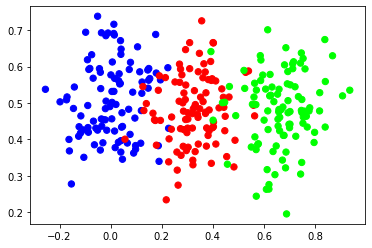

In [27]:
X, y = vertical_data(samples=100, classes=3) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg') 
plt.show()

In [33]:
#Create Model
dense1 = DenseLayer(2, 3)
activation1 = ActivationRelU()
dense2 = DenseLayer(3, 3)
activation2 = ActivationSoftmax()

#Create loss function 
loss_function = CategoricalCrossEntropy()

#Hepler variables
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for i in range(1000):
    #update weight with some small random values

    dense1.weights += 0.05 *np.random.rand(2, 3)
    dense1.biases += 0.05 *np.random.rand(1, 3)
    dense2.weights += 0.05 *np.random.rand(3, 3)
    dense2.biases += 0.05 *np.random.rand(1, 3)
    
    #Perform a forward of our training data through this layer
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function 
    # It take the output of second dense layer here return loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    if loss < lowest_loss:
        print('New set of weights found, iteration:', i, 'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy() 
        dense1.biases = best_dense1_biases.copy() 
        dense2.weights = best_dense2_weights.copy() 
        dense2.biases = best_dense2_biases.copy()
                   
    

New set of weights found, iteration: 0 loss: 1.0986863 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0983028 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0976565 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0971993 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.0963291 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0961597 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0954252 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0951042 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0936978 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0927979 acc: 0.5666666666666667
New set of weights found, iteration: 22 loss: 1.0923805 acc: 0.3333333333333333
New set of weights found, iteration: 23 loss: 1.0896355 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss